Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


KeyError: ignored

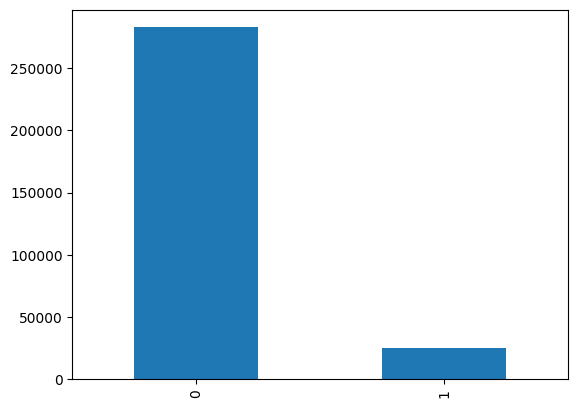

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')

#1. Load Data
tes_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/application_test.csv')
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/application_train.csv')
#bureau = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bureau.csv')
#bureau_balance  = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bureau_balance.csv')
#credit_card_balance = pd.read_csv('/content/drive/My Drive/Colab Notebooks/credit_card_balance.csv')
#homecredit_columns_description = pd.read_csv('/content/drive/My Drive/Colab Notebooks/homecredit_columns_description.csv')
#installments_payments = pd.read_csv('/content/drive/My Drive/Colab Notebooks/installments_payments.csv')
#pos_cash_balance = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pos_cash_balance.csv')
#previous_application = pd.read_csv('/content/drive/My Drive/Colab Notebooks/previous_application.csv')
#sample_submission = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sample_submission.csv')


#2. Exploratory Data Analysis (EDA)
# Tampilkan informasi dasar tentang data pelatihan
train_data.info()

# Tampilkan statistik deskriptif untuk variabel numerik
train_data.describe()

# Tampilkan distribusi variabel target
train_data['TARGET'].value_counts().plot(kind='bar')




#3. Data Cleaning dan Preprocessing
# Tangani nilai-nilai yang hilang
train_data.dropna(inplace=True)

# Lakukan encoding untuk data kategorikal
train_data = pd.get_dummies(train_data)

# Lakukan normalisasi atau standarisasi jika diperlukan
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data[['LAYAK_PINJAM', 'TIPE_KERJA_PEMOHON']] = scaler.fit_transform(train_data[['FLAG_OWN_REALTY', 'NAME_INCOME_TYPE']])

# Pilih fitur dan target
X = train_data.drop(['TARGET'], axis=1)
y = train_data['TARGET']



#4. Pemodelan Regresi Linier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Bagi data menjadi set pelatihan dan validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linier
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

# Lakukan prediksi pada set validasi
predictions = model.predict(X_val)

# Evaluasi hasil
mse = mean_squared_error(y_val, predictions)
print(f'Mean Squared Error: {mse}')



#5. Evaluasi dan Interpretasi Hasil
# Evaluasi performa model pada data uji
test_predictions = model.predict(test_data)

# Interpretasi koefisien regresi
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
coefficients.sort_values(by='coefficient', ascending=False, inplace=True)

# Tampilkan hasil
print("Hasil Prediksi pada Data Uji:")
print(test_predictions)

print("\nInterpretasi Koefisien Regresi:")
print(coefficients)



